<a href="https://colab.research.google.com/github/haythemtellili/Great-notebook/blob/master/zindi_iclr(CV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Create a directory called kaggle and copy the kaggle.json file in it
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d hakymulla/cgiar-computer-vision-for-crop-disease

100% 2.99G/3.00G [00:49<00:00, 33.7MB/s]
100% 3.00G/3.00G [00:50<00:00, 64.3MB/s]


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!unzip \*.zip;

Archive:  cgiar-computer-vision-for-crop-disease.zip
  inflating: ICLR/sample_submission.csv  
  inflating: ICLR/test/test/008FWT.JPG  
  inflating: ICLR/test/test/00AQXY.JPG  
  inflating: ICLR/test/test/01OJZX.JPG  
  inflating: ICLR/test/test/07OXKK.jfif  
  inflating: ICLR/test/test/085IEC.jpg  
  inflating: ICLR/test/test/08O2YE.JPG  
  inflating: ICLR/test/test/08WLJO.jfif  
  inflating: ICLR/test/test/0E1VTP.jfif  
  inflating: ICLR/test/test/0GJFRQ.JPG  
  inflating: ICLR/test/test/0J3PQ7.JPG  
  inflating: ICLR/test/test/0JIX2C.jpg  
  inflating: ICLR/test/test/0K9T9T.jpg  
  inflating: ICLR/test/test/0KAN82.JPG  
  inflating: ICLR/test/test/0KUZ3P.jfif  
  inflating: ICLR/test/test/0L5TC8.jpg  
  inflating: ICLR/test/test/0M9DP3.JPG  
  inflating: ICLR/test/test/0OATVC.jpg  
  inflating: ICLR/test/test/0SB9C6.JPG  
  inflating: ICLR/test/test/0Y28MS.jfif  
  inflating: ICLR/test/test/109IJP.jpg  
  inflating: ICLR/test/test/13GW8I.JPG  
  inflating: ICLR/test/test/1BBY5N.jfif

In [ ]:
# Fast AI doesn't read in .jfif by default, so we need this.
!sudo apt install imagemagick
!cd /content/ICLR/test/test; mogrify -format jpg *.jfif
!cd /content/ICLR/train/train/healthy_wheat; mogrify -format jpg *.jfif  
!cd /content/ICLR/train/train/leaf_rust; mogrify -format jpg *.jfif  
!cd /content/ICLR/train/train/stem_rust; mogrify -format jpg *.jfif 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-goth

In [ ]:
import numpy as np
import pandas as pd

from fastai.utils import *
from fastai.vision import *
from fastai.callbacks import *
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os

In [ ]:
!pip install -q efficientnet_pytorch

In [ ]:
from efficientnet_pytorch import EfficientNet

In [ ]:
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_everything()


In [ ]:


print('Make sure cuda is installed:', torch.cuda.is_available())
print('Make sure cudnn is enabled:', torch.backends.cudnn.enabled)
#tfms=get_transforms(do_flip=True,flip_vert=True,max_lighting=0.2,max_zoom=1.1,max_warp=0.2,max_rotate=10)
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=0.10, max_zoom=1.3, max_warp=0.0, max_lighting=0.2)

Make sure cuda is installed: True
Make sure cudnn is enabled: True


In [ ]:
def get_data(bs, size):
    data = ImageDataBunch.from_folder('/content/ICLR/', train="train/", test='test/', bs=bs, size=size, valid_pct=0.25, 
                                  resize_method=ResizeMethod.SQUISH, 
                                  ds_tfms=tfms,num_workers=4).normalize(imagenet_stats)
    return data



In [ ]:
data = get_data(bs=32,size=256)

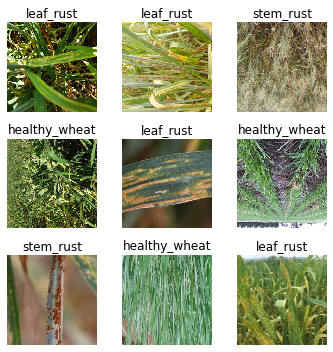

In [ ]:
data.show_batch(rows=3, figsize=(5,5))

In [ ]:
data.c

3

In [ ]:
model_name = 'efficientnet-b4'

In [ ]:
def get_model(pretrained=True, **kwargs):
    model = EfficientNet.from_pretrained(model_name)
    model._fc = nn.Linear(model._fc.in_features, data.c)
    return model

In [ ]:
learn = Learner(data, get_model(), 
                metrics=[accuracy])

Downloading: "https://publicmodels.blob.core.windows.net/container/aa/efficientnet-b4-6ed6700e.pth" to /root/.cache/torch/checkpoints/efficientnet-b4-6ed6700e.pth



Loaded pretrained weights for efficientnet-b4


In [ ]:
learn.fit_one_cycle(10,slice(0.001))

epoch,train_loss,valid_loss,accuracy,time
0,1.056705,1.025661,0.529680,02:09
1,0.830997,0.617365,0.771689,02:07
2,0.637322,0.651613,0.858447,02:04
3,0.520337,0.921594,0.858447,02:07
4,0.425994,0.543847,0.876712,02:05
5,0.368814,0.428843,0.890411,02:05
6,0.305887,0.380376,0.899543,02:08
7,0.233732,0.391409,0.913242,02:04
8,0.186584,0.354216,0.922374,02:06
9,0.153998,0.346047,0.922374,02:06


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10,1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.075402,0.339519,0.922374,02:05
1,0.076644,0.343044,0.917808,02:09
2,0.076747,0.345178,0.926941,02:08
3,0.077256,0.373582,0.913242,02:13
4,0.073832,0.328918,0.926941,02:14
5,0.068757,0.316439,0.926941,02:12
6,0.060911,0.321717,0.926941,02:13
7,0.061798,0.331203,0.926941,02:15
8,0.054893,0.335603,0.922374,02:13
9,0.063026,0.337129,0.917808,02:17


In [ ]:
preds_test,y_test = learn.TTA(ds_type=DatasetType.Test)

In [ ]:
#preds_test,y_test = learn.get_preds(DatasetType.Test)

In [ ]:
import os
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('/content/ICLR/test/test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learn.data.classes):
  submission[c] = preds_test[:,i]
submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,XRSROJ,0.910637,0.089089,0.000274
1,ODZH9T,0.988626,0.001622,0.009752
2,TZISQ4,0.447419,0.489226,0.063355
3,GRI4UU,0.003170,0.996055,0.000774
4,MZHRWG,0.943938,0.054407,0.001656


In [ ]:
submission.to_csv('zindicv.csv', index = False)